In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [8]:
path = "/home/vidi/Work/llnl/CallFlow/data/kripke/"
datasets = ['impi', 'mvapich2']

files = {}
df_file = 'entire_df.csv'
for dataset in datasets:
    files[dataset] = path + dataset + '/' + df_file
    
dfs = {}
for idx, dataset in enumerate(files):
    dfs[dataset] = pd.read_csv(files[dataset])

set1 = datasets[0]
set2 = datasets[1]


print(dfs[set1]['module'].unique())

['<unknown load module>' nan
 '/collab/usr/global/tools/hpctoolkit/toss_3_x86_64_ib/2019-02-26/packages/linux-rhel7-x86_64/gcc-4.9.3/hpctoolkit-develop-szfcj5uplk66ruwembpihb7kexoonoti/lib/hpctoolkit/ext-libs/libmonitor.so.0.0.0'
 '/g/g92/bhatele1/llnl/hpctoolkit/Kripke/build-impi/kripke'
 '/usr/tce/packages/impi/impi-2019.0/compilers_and_libraries_2019.0.117/linux/mpi/intel64/lib/release/libmpi.so.12.0.0'
 '/usr/lib64/libfabric.so.1.9.14' '/usr/lib64/libpsm2.so.2.1'
 '/usr/lib64/ld-2.17.so'
 '/usr/tce/packages/gcc/gcc-4.9.3/lib64/libstdc++.so.6.0.20'
 '/usr/lib64/libc-2.17.so' '/usr/lib64/libm-2.17.so']


In [17]:
group_df = dfs[set1].groupby(['module']).groups
module_to_index = {}
modules = group_df.keys()
for module in group_df:
    module_to_index[module] = pd.DataFrame(index=group_df[row])
print(module_to_index)

{'/collab/usr/global/tools/hpctoolkit/toss_3_x86_64_ib/2019-02-26/packages/linux-rhel7-x86_64/gcc-4.9.3/hpctoolkit-develop-szfcj5uplk66ruwembpihb7kexoonoti/lib/hpctoolkit/ext-libs/libmonitor.so.0.0.0': Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[256 rows x 0 columns], '/g/g92/bhatele1/llnl/hpctoolkit/Kripke/build-impi/kripke': Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 

In [21]:
for module in modules:
    module_df = dfs[set1][['module' == module]]
    print(module_df.shape)

ValueError: Item wrong length 1 instead of 378368.

In [12]:
df = dfs[set1]

df.loc[df['name'] == 'memset.S:101']['module']

Series([], Name: module, dtype: object)

In [17]:
df_merge = pd.merge(dfs[set1], dfs[set2], on='name', right_index=True, left_index=True, suffixes=('_' + set1, '_' + set2))

                     time_mvapich2  time (inc)_mvapich2
module_mvapich2                                        
Unkno                 6.709825e+06         4.506416e+07
kripke                2.007864e+07         6.552169e+07
libc-2.17.so          0.000000e+00         2.276254e+06
libmonitor.so.0.0.0   0.000000e+00         1.945169e+08
libmpi.so.12.0.5      0.000000e+00         2.578232e+06
{'Unkno': [5056488.0, 49760404.0, 59950551.0, 194041468.0], 'kripke': [4879824.25, 50743809.5, 78965971.0, 194787687.0], 'libc-2.17.so': [2267015.0, 2286112.0, 2309993.75, 2413077.0], 'libmonitor.so.0.0.0': [194660348.0, 194685079.5, 194704555.75, 194787687.0], 'libmpi.so.12.0.0': [2027712.25, 2145097.0, 2466481.25, 2912673.0]}
{'Unkno': [5067115.0, 49942723.0, 60736390.75, 194041468.0], 'kripke': [3271322.0, 8377473.0, 78692640.0, 194787687.0], 'libc-2.17.so': [2304672.0, 15989794.5, 49738267.0, 50502671.0], 'libmonitor.so.0.0.0': [194660348.0, 194685079.5, 194704555.75, 194787687.0], 'libmpi.so.12.0

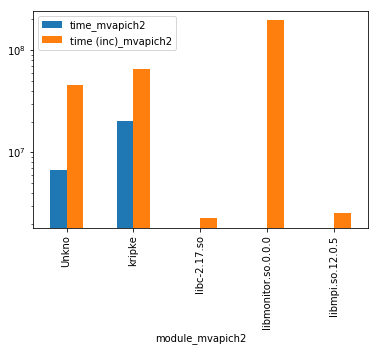

In [19]:
# Quantile calculation

def add_to_map(mapper, key, vals):
    mapper[key] = vals

# df_merge = df_merge[['time (inc)_' + set1, 'module_' + set1, 'rank_' + set1]]

group_df = df_merge.groupby(["module_" + set1])
mean_group_df = group_df.mean()
# mean_group_df.plot(kind='bar').set_yscale('log')

mapper = {}
for group in group_df['time (inc)_impi']:
    vals = group[1]
    q = vals.quantile([0.25, 0.5, 0.75, 1])
    key = group[0].split('/')[-1]
    mapper[key] = list(q)
    
# df_merge = df_merge[['time (inc)_' + set2, 'module_' + set2, 'rank_' + set2]]

mapper_set2 = {}
group_df = df_merge.groupby(["module_" + set2])
mean_group_df = group_df.mean()
plot_mean_group_df = mean_group_df[['time_'+ set2, 'time (inc)_' + set2]]
print(plot_mean_group_df)
plot_mean_group_df.plot(kind='bar').set_yscale('log')

for group in group_df['time (inc)_impi']:
    vals = group[1]
    q = vals.quantile([0.25, 0.5, 0.75, 1])
    key = group[0].split('/')[-1]
    mapper_set2[key] = list(q)
    
print(mapper)
print(mapper_set2)
print(  6.709825e+06 + 2.007864e+07)

In [32]:
path = "/home/vidi/Work/llnl/CallFlow/data/kripke/"
datasets = ['impi', 'mvapich2']

files = {}
df_file = 'entire_df.csv'
for dataset in datasets:
    files[dataset] = path + dataset + '/' + df_file
    
dfs = {}
for idx, dataset in enumerate(files):
    dfs[dataset] = pd.read_csv(files[dataset])

set1 = datasets[0]
set2 = datasets[1]

# Regular equivalence:
# Merge by Name. I think this is an issue. The merge is not happening correctly. 
df_merge = pd.merge(dfs[set1], dfs[set2], on='name', right_index=True, left_index=True, suffixes=('_' + set1, '_' + set2))

# Compare if the same function is inside a module in both datasets
attr = 'module_'

# Set a new column which sets to True if nodes belong to same module. 
df_merge['is_diff'] = np.where(df_merge[attr + set1] == df_merge[attr + set2], True, False)

matched_df = df_merge.loc[df_merge['is_diff'] == True]
non_matched_df = df_merge.loc[df_merge['is_diff'] == False]

# print("Total number of nodes", len(nodes))
print("Matched node count", len(matched_df['node_' + set1].unique()))
print("Un-matched node count", len(non_matched_df['node_' + set1].unique()))

Matched node count 132
Un-matched node count 837


In [131]:
print(df_merge['time (inc)_' + datasets[0]])

0                0.0
1                0.0
2                0.0
3                0.0
4                0.0
5                0.0
6                0.0
7                0.0
8                0.0
9                0.0
10               0.0
11               0.0
12               0.0
13               0.0
14               0.0
15               0.0
16               0.0
17               0.0
18               0.0
19               0.0
20               0.0
21               0.0
22               0.0
23               0.0
24               0.0
25               0.0
26               0.0
27               0.0
28               0.0
29               0.0
             ...    
255586           0.0
255587           0.0
255588           0.0
255589           0.0
255590    20638765.0
255591           0.0
255592           0.0
255593           0.0
255594           0.0
255595           0.0
255596           0.0
255597           0.0
255598           0.0
255599           0.0
255600           0.0
255601           0.0
255602       